In [2]:
df<-read.csv('d:/data/iris/iris2.csv')
head(df)

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,target,Result
5.1,3.5,1.4,0.2,setosa,0
4.9,3.0,1.4,0.2,setosa,0
4.7,3.2,1.3,0.2,setosa,0
4.6,3.1,1.5,0.2,setosa,0
5.0,3.6,1.4,0.2,setosa,0
5.4,3.9,1.7,0.4,setosa,0


In [4]:
library(dplyr)
df<-df %>% select(-target)

str(df)
#종속변수의 자료형을 숫자형에서 팩터 타입으로 변경
df$Result <- as.factor(df$Result)
str(df)

dim(df)
head(df)

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



'data.frame':	150 obs. of  5 variables:
 $ sepal.length..cm.: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal.width..cm. : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal.length..cm.: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal.width..cm. : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Result           : int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	150 obs. of  5 variables:
 $ sepal.length..cm.: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ sepal.width..cm. : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ petal.length..cm.: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ petal.width..cm. : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Result           : Factor w/ 3 levels "0","1","2": 1 1 1 1 1 1 1 1 1 1 ...


[1] 150   5

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result
5.1,3.5,1.4,0.2,0
4.9,3.0,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5.0,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0


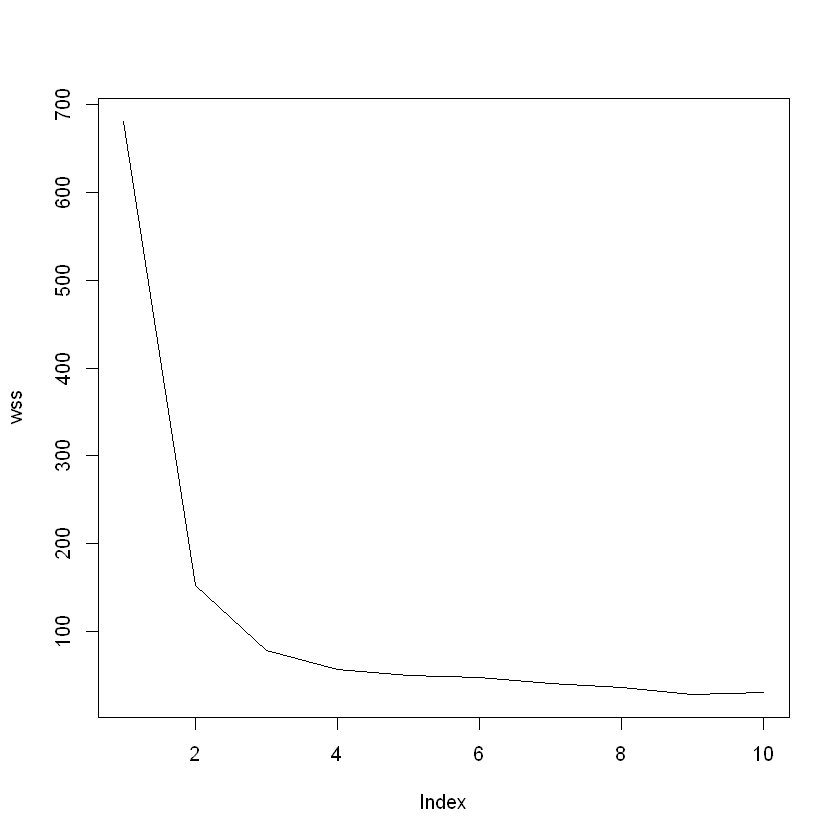

In [9]:
#최적의 클러스터 갯수를 구하는 과정(wss 클러스터 내 총제곱합)
result<-NULL
for(k in 1:10){
    result[[k]]<-kmeans(df[-5],k)
}
wss<-numeric(10)
for(k in 1:10){
    wss[k]<-result[[k]]$tot.withinss
}
plot(wss,type='l')

[1] 0.6810462

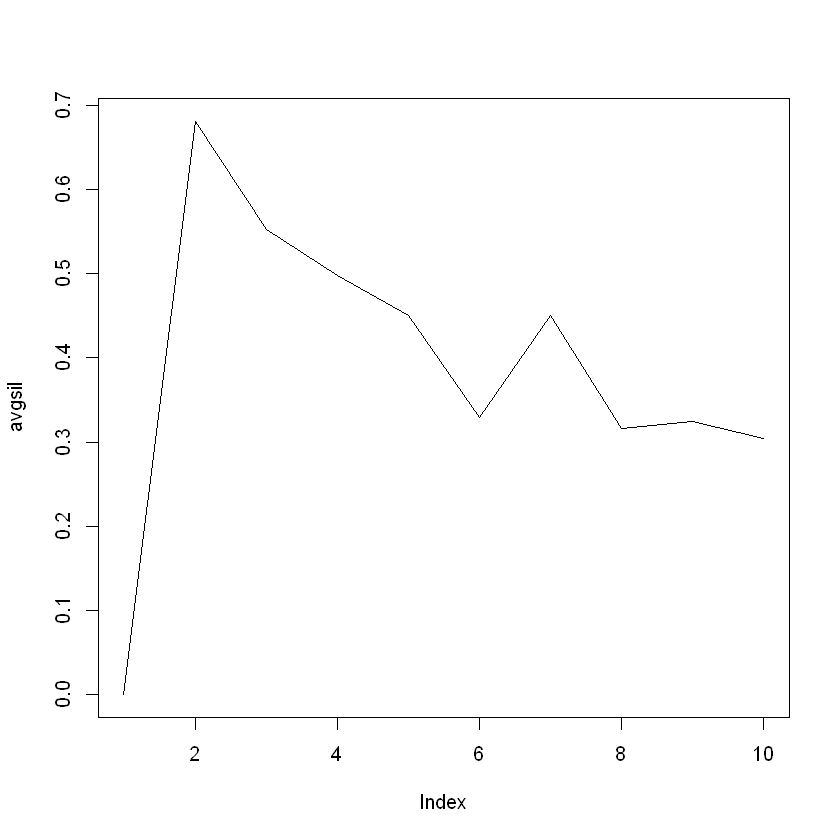

In [10]:
#최적의 클러스터 갯수를 구하는 과정(실루엣 포인트)
library(cluster)
avgsil<-numeric(10)
for(k in 2:10){
    si<-summary(silhouette(result[[k]]$cluster,dist(df[,-5])))
    avgsil[k]<-si$avg.width
}
max(avgsil)
plot(avgsil,type='l')

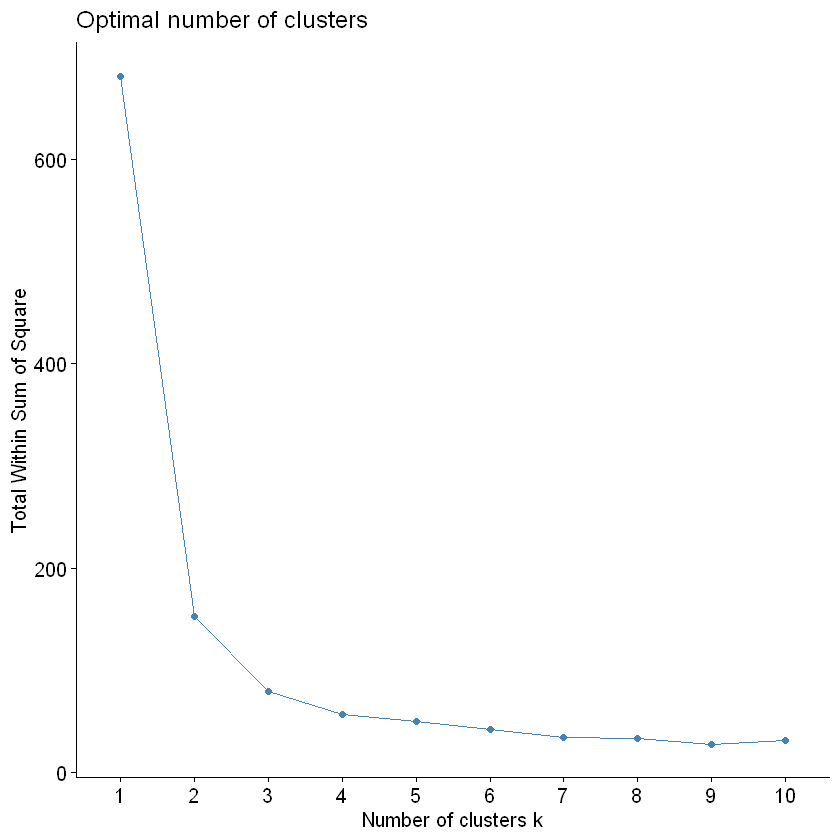

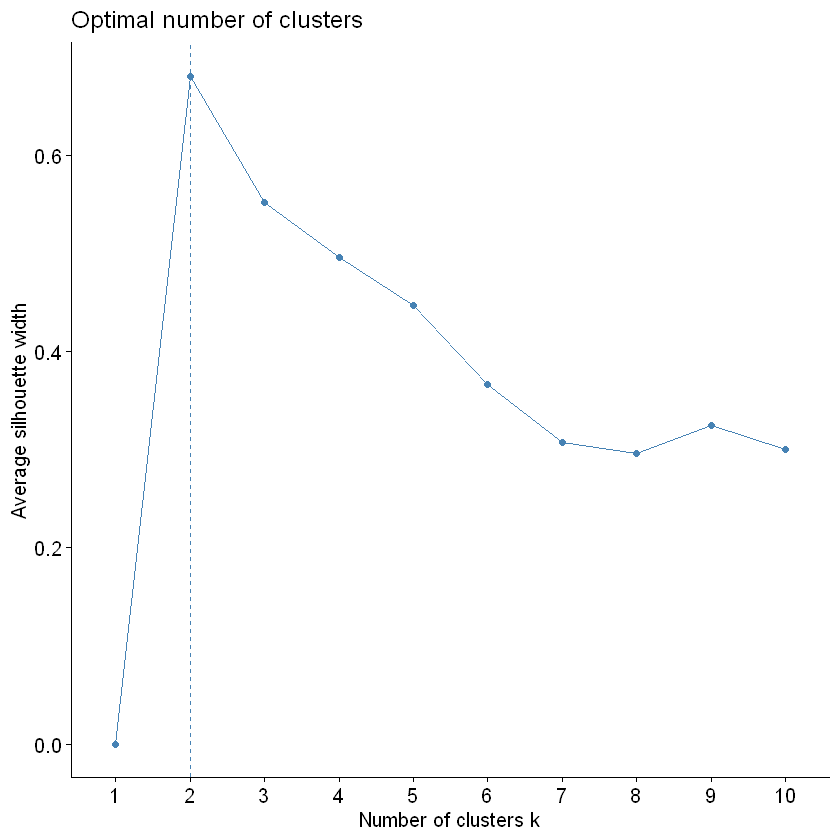

In [12]:
library(factoextra)
fviz_nbclust(df[,-5],FUN=kmeans,method='wss')
fviz_nbclust(df[,-5],FUN=kmeans,method='silhouette')

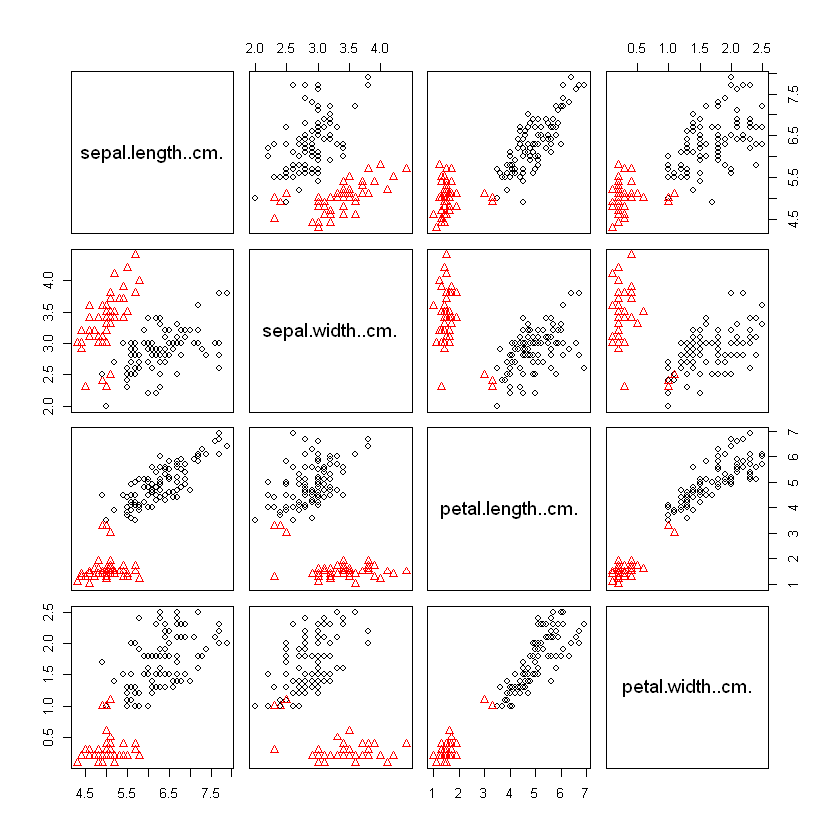

In [13]:
#산점도 행렬(군집갯수 2)
plot(df[,-5],pch=result[[2]]$cluster,col=result[[2]]$cluster)

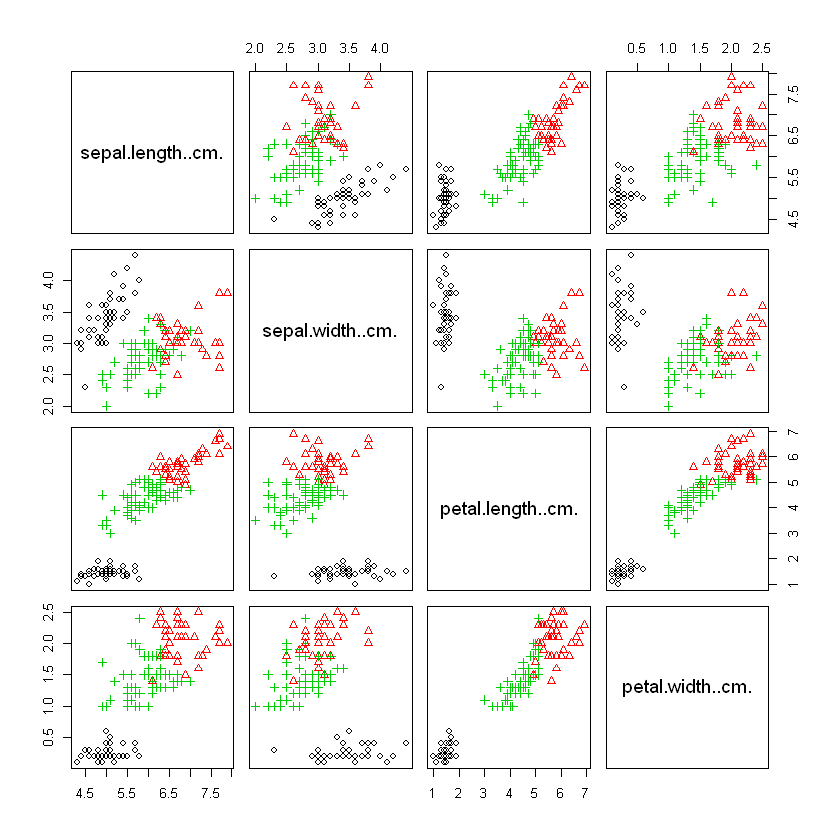

In [14]:
#산점도 행렬(군집갯수3)
plot(df[,-5],pch=result[[3]]$cluster,col=result[[3]]$cluster)

In [15]:
set.seed(123)
#군집갯수를 3으로 설정한 모형
model<-kmeans(df[,-5],centers=3)
model
model$centers

K-means clustering with 3 clusters of sizes 50, 62, 38

Cluster means:
  sepal.length..cm. sepal.width..cm. petal.length..cm. petal.width..cm.
1          5.006000         3.428000          1.462000         0.246000
2          5.901613         2.748387          4.393548         1.433871
3          6.850000         3.073684          5.742105         2.071053

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

Within cluster sum of squares by cluster:
[1] 15.15100 39.82097 23.87947
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.
5.006000,3.428000,1.462000,0.246000
5.901613,2.748387,4.393548,1.433871
6.850000,3.073684,5.742105,2.071053


In [19]:
model$cluster -1 

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

In [16]:
#모형에서 예측한 값 (model$cluster)를 팩터 타입으로 변환
df$cluster<- as.factor(model$cluster - 1)

In [20]:
df

sepal.length..cm.,sepal.width..cm.,petal.length..cm.,petal.width..cm.,Result,cluster
5.1,3.5,1.4,0.2,0,0
4.9,3.0,1.4,0.2,0,0
4.7,3.2,1.3,0.2,0,0
4.6,3.1,1.5,0.2,0,0
5.0,3.6,1.4,0.2,0,0
5.4,3.9,1.7,0.4,0,0
4.6,3.4,1.4,0.3,0,0
5.0,3.4,1.5,0.2,0,0
4.4,2.9,1.4,0.2,0,0
4.9,3.1,1.5,0.1,0,0


In [24]:
convert<-function(i){
    if(i==0){
        return("0")
    }else if(i==1){
        return("2")
    }else if(i==2){
        return("1")
    }
}
result<-sapply(df$cluster,convert)
#result

In [26]:
#실제값과 확인하는 과정
table(df$Result, df$cluster)
mean(df$Result == df$cluster)
table(df$Result, result)
mean(df$Result == result)

   
     0  1  2
  0 50  0  0
  1  0 14 36
  2  0 48  2

[1] 0.44

   result
     0  1  2
  0 50  0  0
  1  0 36 14
  2  0  2 48

[1] 0.8933333